<a href="https://colab.research.google.com/github/ReJackTion/rl-bitcoin/blob/main/Reinforcement_Learning_Bitcoin_Trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Install and Import dependencies

In [4]:
!pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines gym-anytrading gym

     |████████████████████████████████| 411.5 MB 6.8 kB/s 
     |████████████████████████████████| 412.3 MB 29 kB/s 
     |████████████████████████████████| 50 kB 7.0 MB/s 
     |████████████████████████████████| 3.8 MB 47.2 MB/s 
     |████████████████████████████████| 503 kB 33.6 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=e21388047e1c8faf0d3ab38f8e177f7a38b85bd0009204091d118c0f7e20d60b
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.6.0
    Uninstalling tensorboard-2.6.0:
      Successfully uninstalled tensorboard-2.6.0
  Attempting uninstall: gast
    Found existing install

In [2]:
# Gym stuff
import gym
import gym_anytrading

# Stable baselines - rl stuff
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Upload files
from google.colab import files

# 1. Download Bitcoin Historical Data 
https://www.investing.com/crypto/bitcoin/historical-data

In [10]:
files.upload()

Saving Bitcoin Historical Data - Investing.com.csv to Bitcoin Historical Data - Investing.com.csv


{'Bitcoin Historical Data - Investing.com.csv': b'\xef\xbb\xbf"Date","Price","Open","High","Low","Vol.","Change %"\r\n"Oct 15, 2021","59,186.2","57,348.2","59,918.6","56,874.8","80.73K","3.21%"\r\n"Oct 14, 2021","57,345.8","57,370.4","58,506.5","56,866.8","59.84K","-0.06%"\r\n"Oct 13, 2021","57,380.1","56,014.5","57,697.4","54,314.4","73.62K","2.44%"\r\n"Oct 12, 2021","56,015.9","57,480.6","57,635.7","54,155.4","74.85K","-2.54%"\r\n"Oct 11, 2021","57,477.3","54,686.9","57,814.1","54,457.8","73.84K","5.10%"\r\n"Oct 10, 2021","54,687.7","54,942.5","56,432.2","54,100.8","104.43K","-0.46%"\r\n"Oct 09, 2021","54,942.5","53,924.1","55,430.8","53,711.7","64.65K","1.91%"\r\n"Oct 08, 2021","53,914.7","53,785.5","55,977.9","53,659.3","64.05K","0.24%"\r\n"Oct 07, 2021","53,783.9","55,325.2","55,325.6","53,476.4","75.68K","-2.78%"\r\n"Oct 06, 2021","55,323.2","51,470.0","55,676.1","50,439.5","116.26K","7.49%"\r\n"Oct 05, 2021","51,469.3","49,229.5","51,872.4","49,060.1","76.63K","4.55%"\r\n"Oct 04

In [64]:
df = pd.read_csv('/content/Bitcoin Historical Data - Investing.com.csv')
df

,Date,Price,Open,High,Low,Vol.,Change %
0,"Oct 15, 2021","59,186.2","57,348.2","59,918.6","56,874.8",80.73K,3.21%
1,"Oct 14, 2021","57,345.8","57,370.4","58,506.5","56,866.8",59.84K,-0.06%
2,"Oct 13, 2021","57,380.1","56,014.5","57,697.4","54,314.4",73.62K,2.44%
3,"Oct 12, 2021","56,015.9","57,480.6","57,635.7","54,155.4",74.85K,-2.54%
4,"Oct 11, 2021","57,477.3","54,686.9","57,814.1","54,457.8",73.84K,5.10%
...,...,...,...,...,...,...,...
4103,"Jul 22, 2010",0.1,0.1,0.1,0.1,2.16K,0.00%
4104,"Jul 21, 2010",0.1,0.1,0.1,0.1,0.58K,0.00%
4105,"Jul 20, 2010",0.1,0.1,0.1,0.1,0.26K,0.00%
4106,"Jul 19, 2010",0.1,0.1,0.1,0.1,0.57K,0.00%


In [65]:
df.rename(columns={"Price": "Close", "Vol.": "Vol"}, inplace=True)
df

,Date,Close,Open,High,Low,Vol,Change %
0,"Oct 15, 2021","59,186.2","57,348.2","59,918.6","56,874.8",80.73K,3.21%
1,"Oct 14, 2021","57,345.8","57,370.4","58,506.5","56,866.8",59.84K,-0.06%
2,"Oct 13, 2021","57,380.1","56,014.5","57,697.4","54,314.4",73.62K,2.44%
3,"Oct 12, 2021","56,015.9","57,480.6","57,635.7","54,155.4",74.85K,-2.54%
4,"Oct 11, 2021","57,477.3","54,686.9","57,814.1","54,457.8",73.84K,5.10%
...,...,...,...,...,...,...,...
4103,"Jul 22, 2010",0.1,0.1,0.1,0.1,2.16K,0.00%
4104,"Jul 21, 2010",0.1,0.1,0.1,0.1,0.58K,0.00%
4105,"Jul 20, 2010",0.1,0.1,0.1,0.1,0.26K,0.00%
4106,"Jul 19, 2010",0.1,0.1,0.1,0.1,0.57K,0.00%


In [66]:
df.dtypes

Date        object
Close       object
Open        object
High        object
Low         object
Vol         object
Change %    object
dtype: object

In [67]:
df['Vol'] = df['Vol'].replace({'K': '*1e3', 'M': '*1e6', '-': '0'}, regex=True).map(pd.eval)
df2 = df.loc[:, df.columns.difference(['Date'])].replace({'%': '', ',': ''}, regex=True).astype(float)
df = pd.concat([df['Date'], df2], axis=1)
df

,Date,Change %,Close,High,Low,Open,Vol
0,"Oct 15, 2021",3.21,59186.2,59918.6,56874.8,57348.2,80730.0
1,"Oct 14, 2021",-0.06,57345.8,58506.5,56866.8,57370.4,59840.0
2,"Oct 13, 2021",2.44,57380.1,57697.4,54314.4,56014.5,73620.0
3,"Oct 12, 2021",-2.54,56015.9,57635.7,54155.4,57480.6,74850.0
4,"Oct 11, 2021",5.10,57477.3,57814.1,54457.8,54686.9,73840.0
...,...,...,...,...,...,...,...
4103,"Jul 22, 2010",0.00,0.1,0.1,0.1,0.1,2160.0
4104,"Jul 21, 2010",0.00,0.1,0.1,0.1,0.1,580.0
4105,"Jul 20, 2010",0.00,0.1,0.1,0.1,0.1,260.0
4106,"Jul 19, 2010",0.00,0.1,0.1,0.1,0.1,570.0


In [68]:
df.apply(pd.to_numeric, errors='ignore')
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date        datetime64[ns]
Change %           float64
Close              float64
High               float64
Low                float64
Open               float64
Vol                float64
dtype: object

In [70]:
df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Vol', 'Change %']]
df.set_index('Date', inplace=True)
df

,Open,High,Low,Close,Vol,Change %
Date,,,,,,
2021-10-15,57348.2,59918.6,56874.8,59186.2,80730.0,3.21
2021-10-14,57370.4,58506.5,56866.8,57345.8,59840.0,-0.06
2021-10-13,56014.5,57697.4,54314.4,57380.1,73620.0,2.44
2021-10-12,57480.6,57635.7,54155.4,56015.9,74850.0,-2.54
2021-10-11,54686.9,57814.1,54457.8,57477.3,73840.0,5.10
...,...,...,...,...,...,...
2010-07-22,0.1,0.1,0.1,0.1,2160.0,0.00
2010-07-21,0.1,0.1,0.1,0.1,580.0,0.00
2010-07-20,0.1,0.1,0.1,0.1,260.0,0.00


In [108]:
df = df.iloc[::-1]
df

,Open,High,Low,Close,Vol,Change %
Date,,,,,,
2010-07-18,0.0,0.1,0.1,0.1,80.0,0.00
2010-07-19,0.1,0.1,0.1,0.1,570.0,0.00
2010-07-20,0.1,0.1,0.1,0.1,260.0,0.00
2010-07-21,0.1,0.1,0.1,0.1,580.0,0.00
2010-07-22,0.1,0.1,0.1,0.1,2160.0,0.00
...,...,...,...,...,...,...
2021-10-11,54686.9,57814.1,54457.8,57477.3,73840.0,5.10
2021-10-12,57480.6,57635.7,54155.4,56015.9,74850.0,-2.54
2021-10-13,56014.5,57697.4,54314.4,57380.1,73620.0,2.44


In [117]:
env = gym.make('stocks-v0', df=df, frame_bound=(3300,4108), window_size=1300)

In [118]:
env.signal_features

array([[ 4.52900e+02,  0.00000e+00],
       [ 4.48300e+02, -4.60000e+00],
       [ 4.46200e+02, -2.10000e+00],
       ...,
       [ 5.73801e+04,  1.36420e+03],
       [ 5.73458e+04, -3.43000e+01],
       [ 5.91862e+04,  1.84040e+03]])

# 2. Build Environment

In [119]:
env.action_space

Discrete(2)

info {'total_reward': 11698.09999999997, 'total_profit': 0.06256938632599948, 'position': 0}


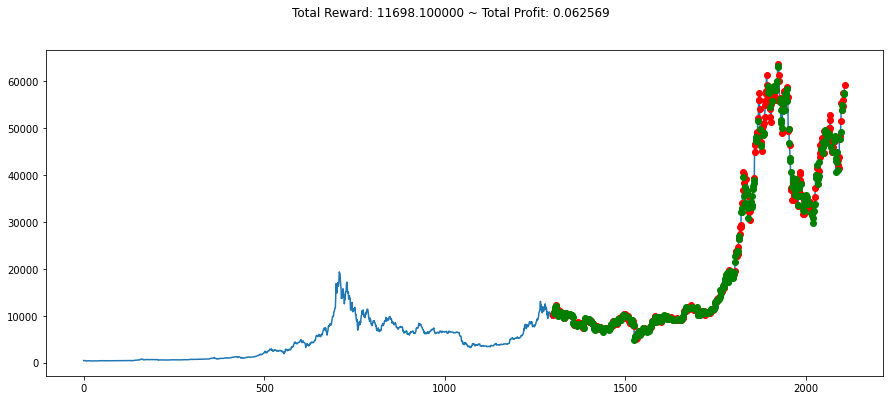

In [120]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

# 3. Build Environment and Train

In [123]:
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(3300,4108), window_size=1300)
env = DummyVecEnv([env_maker])

In [124]:
model = A2C('MlpLstmPolicy', env, verbose=1) 
model.learn(total_timesteps=100000)

---------------------------------
| explained_variance | 0.000188 |
| fps                | 19       |
| nupdates           | 1        |
| policy_entropy     | 0.69     |
| total_timesteps    | 5        |
| value_loss         | 7.77e+03 |
---------------------------------
---------------------------------
| explained_variance | 2.95e-05 |
| fps                | 237      |
| nupdates           | 100      |
| policy_entropy     | 0.691    |
| total_timesteps    | 500      |
| value_loss         | 1.55e+05 |
---------------------------------
---------------------------------
| explained_variance | 0.00734  |
| fps                | 255      |
| nupdates           | 200      |
| policy_entropy     | 0.693    |
| total_timesteps    | 1000     |
| value_loss         | 6.3e+04  |
---------------------------------
---------------------------------
| explained_variance | 3.17e-05 |
| fps                | 262      |
| nupdates           | 300      |
| policy_entropy     | 0.693    |
| total_timest

# 4. Evaluation

In [129]:
env = gym.make('stocks-v0', df=df, frame_bound=(3300,4108), window_size=1300)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 33456.500000000015, 'total_profit': 0.38214482949141054, 'position': 1}


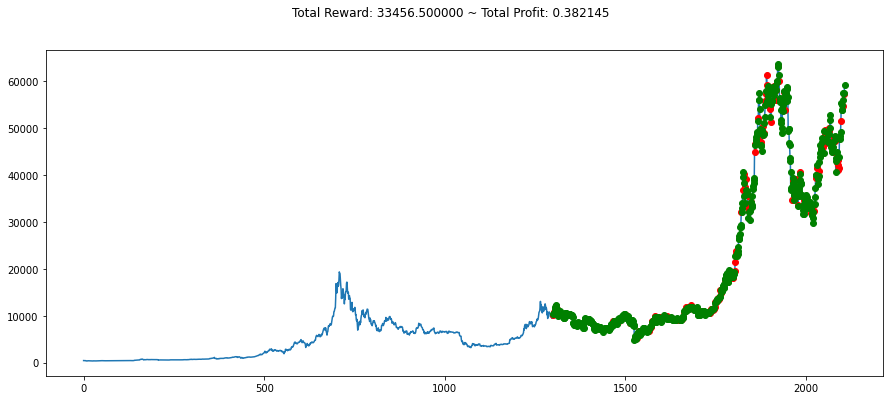

In [130]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()